# Predict and Classify the appearance of criminal incidents based on historical incident reports

## Summary
This analysis tries to build a logistic regression model that can predict whether the incident happened will be a criminal incident or not from the incident's time period, day of the week, and the police district. The model is built upon the 2023 San Francisco Police Department.

## Introduction

Law enforcement agencies globally prioritize crime prevention and public safety. Effective policing requires strategically allocating resources to prevent crime and respond promptly to incidents (Perry et al., 2013). In the past, police departments have depended on experience and intuition to determine patrol schedules and allocate resources. Advancements in data analysis and predictive modeling allow law enforcement organizations to take a more data-driven strategy. Some magazines stated that usually, many police incidents take place during the day but more violent incidents happen at night (Security, 2019).

Therefore, this analysis seeks to investigate the correlation between crime rates and various periods of the day (morning, afternoon, evening, night, and late night) through the analysis of 2023 police reports in San Francisco. The goal is to recognize trends that may suggest if certain time periods are linked to increased or decreased crime rates (Braga and Weisburd, 2010). This information could greatly improve police patrols by helping law enforcement organizations distribute resources wisely, promoting a proactive approach to crime prevention. 

Comprehending the time-related patterns of criminal behavior is essential for creating specific treatments that can decrease crime rates and enhance community security (D'Angelo,2018). This study aims to categorize time periods as having either high or low crime rates by utilizing 2023 police reports data. The goal is to provide a forecasting tool that can assist in decision-making for police patrol scheduling and resource allocation. This method has the capacity to enhance law enforcement activities and enhance public safety and security.

Our research aims to connect conventional policing approaches with current, data-driven methodologies to offer practical insights that help improve the efficiency and efficacy of crime prevention efforts.


**Research Question**: Given 2023 San Francisco police reports, can we predict likelihood of the criminal incidents based on time period, day of week, and police district?

**Time Periods**:
* Morning: 6:01am to 12:00pm
* Afternoon: 12:01pm to 6:00pm
* Evening: 6:01pm to 9:00pm
* Night: 9:01pm to 12:00am
* Late Night: 00:01am to 6:00am

**Criminal Incidents are defined below when adding a column to identify incidents' types.**

**Data Set**: The data set is from the San Francisco Police Department's(SFPD) Incident Report Dataset. The original link to the website is as follows: *https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data.* This original data set contains incident reports from 2018 to the present, but the link downloading the data set provides data contains 2023-specific data. These incident reports are filled by self-reported members or by officers using SFPD's online reporting system. The data set contains 27 columns of useful information related to each specific incident, including date time, incident ID, etc . 








## Methods & Results 

### Load Data From the Web

In [3]:
import pandas as pd
import numpy as np
import sys
import os

# import the get_time_period function from the src folder
sys.path.append('..')
from src.function_time_period import get_time_period

In [4]:
url="https://data.sfgov.org/resource/wg3w-h783.csv?$query=SELECT%0A%20%20%60incident_datetime%60%2C%0A%20%20%60incident_date%60%2C%0A%20%20%60incident_time%60%2C%0A%20%20%60incident_year%60%2C%0A%20%20%60incident_day_of_week%60%2C%0A%20%20%60report_datetime%60%2C%0A%20%20%60row_id%60%2C%0A%20%20%60incident_id%60%2C%0A%20%20%60incident_number%60%2C%0A%20%20%60cad_number%60%2C%0A%20%20%60report_type_code%60%2C%0A%20%20%60report_type_description%60%2C%0A%20%20%60filed_online%60%2C%0A%20%20%60incident_code%60%2C%0A%20%20%60incident_category%60%2C%0A%20%20%60incident_subcategory%60%2C%0A%20%20%60incident_description%60%2C%0A%20%20%60resolution%60%2C%0A%20%20%60intersection%60%2C%0A%20%20%60cnn%60%2C%0A%20%20%60police_district%60%2C%0A%20%20%60analysis_neighborhood%60%2C%0A%20%20%60supervisor_district%60%2C%0A%20%20%60supervisor_district_2012%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60point%60%2C%0A%20%20%60%3A%40computed_region_jwn9_ihcz%60%2C%0A%20%20%60%3A%40computed_region_jg9y_a9du%60%2C%0A%20%20%60%3A%40computed_region_h4ep_8xdi%60%2C%0A%20%20%60%3A%40computed_region_n4xg_c4py%60%2C%0A%20%20%60%3A%40computed_region_nqbw_i6c3%60%2C%0A%20%20%60%3A%40computed_region_viu7_rrfi%60%2C%0A%20%20%60%3A%40computed_region_26cr_cadq%60%2C%0A%20%20%60%3A%40computed_region_qgnn_b9vv%60%0AWHERE%20caseless_one_of(%60incident_year%60%2C%20%222023%22)"
raw_data=pd.read_csv(url,parse_dates=['incident_datetime']) # parse date time
raw_data.head()

,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_datetime,row_id,incident_id,incident_number,cad_number,...,longitude,point,:@computed_region_jwn9_ihcz,:@computed_region_jg9y_a9du,:@computed_region_h4ep_8xdi,:@computed_region_n4xg_c4py,:@computed_region_nqbw_i6c3,:@computed_region_viu7_rrfi,:@computed_region_26cr_cadq,:@computed_region_qgnn_b9vv
0,2023-03-13 23:41:00,2023-03-13T00:00:00.000,23:41,2023,Monday,2023-03-13T23:41:00.000,125373607041,1253736,230167874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-01 05:02:00,2023-03-01T00:00:00.000,05:02,2023,Wednesday,2023-03-11T15:40:00.000,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-13 13:16:00,2023-03-13T00:00:00.000,13:16,2023,Monday,2023-03-13T13:17:00.000,125357107041,1253571,220343896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-13 10:59:00,2023-03-13T00:00:00.000,10:59,2023,Monday,2023-03-13T11:00:00.000,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-14 18:44:00,2023-03-14T00:00:00.000,18:44,2023,Tuesday,2023-03-14T18:45:00.000,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Isolate Necessary Features

We are isolating features such as columns with missing values, and removing feature columns that seem to have little relevance with out prediction. The code belows create a new DataFrame data containing only the specified columns from 'raw_data', and then displaying the first few rows of this new DataFrame.

In [3]:
data = raw_data[['incident_datetime','incident_time','incident_day_of_week','incident_category','incident_subcategory','police_district']]
data.head()

,incident_datetime,incident_time,incident_day_of_week,incident_category,incident_subcategory,police_district
0,2023-03-13 23:41:00,23:41,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF
1,2023-03-01 05:02:00,05:02,Wednesday,Larceny Theft,Larceny Theft - Other,Mission
2,2023-03-13 13:16:00,13:16,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF
3,2023-03-13 10:59:00,10:59,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF
4,2023-03-14 18:44:00,18:44,Tuesday,Recovered Vehicle,Recovered Vehicle,Out of SF


### Add Hour and Minute Features

We are adding two new columns by extracting the hour and minute from 'incident_time'.

In [4]:
data = data.assign(hour = data['incident_datetime'].dt.hour,
                   minute = data['incident_datetime'].dt.minute)
data.head()

,incident_datetime,incident_time,incident_day_of_week,incident_category,incident_subcategory,police_district,hour,minute
0,2023-03-13 23:41:00,23:41,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,23,41
1,2023-03-01 05:02:00,05:02,Wednesday,Larceny Theft,Larceny Theft - Other,Mission,5,2
2,2023-03-13 13:16:00,13:16,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,13,16
3,2023-03-13 10:59:00,10:59,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,10,59
4,2023-03-14 18:44:00,18:44,Tuesday,Recovered Vehicle,Recovered Vehicle,Out of SF,18,44


### Add Feature Identifying Time Period

We want to differentiate time periods using function categorizes the time of the incident into one of these time periods. To create a new column indicating the time period of each incident.

In [5]:
# differentiate time periods
# def get_time_period(hour,minute):
#     if 0 < hour < 6 or (hour == 6 and minute == 0):
#         return 'Late Night'
#     elif 6 < hour < 12 or (hour == 6 and minute > 0) or (hour == 12 and minute == 0):
#         return 'Morning'
#     elif 12 < hour < 18 or (hour == 12 and minute > 0) or (hour == 18 and minute == 0):
#         return 'Afternoon'
#     elif 18 < hour < 21 or (hour == 18 and minute > 0) or (hour == 21 and minute == 0):
#         return 'Evening'
#     else:
#         return 'Night'

Adding a new column to the DataFrame data that categorizes each incident's time into one of the predefined time periods.

In [6]:
data = data.assign(time_period = data.apply(lambda row: get_time_period(row['hour'], row['minute']), axis=1))
data

,incident_datetime,incident_time,incident_day_of_week,incident_category,incident_subcategory,police_district,hour,minute,time_period
0,2023-03-13 23:41:00,23:41,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,23,41,Night
1,2023-03-01 05:02:00,05:02,Wednesday,Larceny Theft,Larceny Theft - Other,Mission,5,2,Late Night
2,2023-03-13 13:16:00,13:16,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,13,16,Afternoon
3,2023-03-13 10:59:00,10:59,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,10,59,Morning
4,2023-03-14 18:44:00,18:44,Tuesday,Recovered Vehicle,Recovered Vehicle,Out of SF,18,44,Evening
...,...,...,...,...,...,...,...,...,...
995,2023-08-28 15:30:00,15:30,Monday,Non-Criminal,Non-Criminal,Mission,15,30,Afternoon
996,2023-08-28 06:40:00,06:40,Monday,Assault,Simple Assault,Northern,6,40,Morning
997,2023-08-13 00:00:00,00:00,Sunday,Malicious Mischief,Other,Central,0,0,Night
998,2023-08-27 16:21:00,16:21,Sunday,Missing Person,Missing Person,Southern,16,21,Afternoon


### Add Feature to Classify Criminal Incidents

Defining a list named *criminal_incident* which contains various subcategories of criminal incidents. Each item in this list represents a specific type of criminal incident.

In [7]:
# identify criminal incidents using subcategory
criminal_incident = ["Larceny - From Vehicle", "Vandalism", "Larceny Theft - Other", "Motor Vehicle Theft",             
"Simple Assault", "Drug Violation", "Aggravated Assault", "Fraud", "Theft From Vehicle",                  
"Burglary - Other", "Weapons Offense", "Intimidation", "Warrant", "Larceny - Auto Parts",                
"Other Offenses", "Larceny Theft - From Building", "Larceny Theft - Shoplifting",         
"Robbery - Other", "Burglary - Residential", "Robbery - Street",                    
"Traffic Violation Arrest", "Robbery - Commercial", "Larceny Theft - Pickpocket", "Forgery And Counterfeiting",           
"Motor Vehicle Theft (Attempted)", "Burglary - Hot Prowl", "Prostitution",                         
"Burglary - Commercial", "Disorderly Conduct", "Arson",                                
"Larceny Theft - Bicycle", "Embezzlement",                         
"Extortion-Blackmail", "Sex Offense"]                             

Creating a binary *if_crime* column serves as the target variable for predictive modeling, aiding in distinguishing incidents classified as crimes from those that are not. By setting *if_crime* as binary (1 for crime, 0 for non-crime), it facilitates binary classification tasks, where machine learning models can learn to predict whether an incident constitutes a crime based on its features. This clear target variable enables supervised learning algorithms to discern patterns and relationships between incident characteristics and criminal activities, ultimately allowing for the development of predictive models that can accurately classify new incidents as crimes or non-crimes based on their attributes.

In [8]:
data = data.assign(if_crime = data.apply(lambda row: int(row['incident_subcategory'] in criminal_incident), axis=1))
data

,incident_datetime,incident_time,incident_day_of_week,incident_category,incident_subcategory,police_district,hour,minute,time_period,if_crime
0,2023-03-13 23:41:00,23:41,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,23,41,Night,0
1,2023-03-01 05:02:00,05:02,Wednesday,Larceny Theft,Larceny Theft - Other,Mission,5,2,Late Night,1
2,2023-03-13 13:16:00,13:16,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,13,16,Afternoon,0
3,2023-03-13 10:59:00,10:59,Monday,Recovered Vehicle,Recovered Vehicle,Out of SF,10,59,Morning,0
4,2023-03-14 18:44:00,18:44,Tuesday,Recovered Vehicle,Recovered Vehicle,Out of SF,18,44,Evening,0
...,...,...,...,...,...,...,...,...,...,...
995,2023-08-28 15:30:00,15:30,Monday,Non-Criminal,Non-Criminal,Mission,15,30,Afternoon,0
996,2023-08-28 06:40:00,06:40,Monday,Assault,Simple Assault,Northern,6,40,Morning,1
997,2023-08-13 00:00:00,00:00,Sunday,Malicious Mischief,Other,Central,0,0,Night,0
998,2023-08-27 16:21:00,16:21,Sunday,Missing Person,Missing Person,Southern,16,21,Afternoon,0


### Isolate Necessary Features For Model

We believe that predicting whether an incident constitutes a crime or not based solely on *incident_category* and *incident_subcategory* may not provide significant value. Therefore, we have opted to exclude these columns from our analysis. Instead, we aim to assess the influence of *incident_day_of_week*, *police_district*, and *time_period* on our prediction. This approach allows us to investigate whether the temporal and spatial factors, such as time periods and police district locations, have a measurable impact on the frequency of criminal incidents.

In [9]:
data = data[['incident_day_of_week','police_district','time_period', 'if_crime']]
data

,incident_day_of_week,police_district,time_period,if_crime
0,Monday,Out of SF,Night,0
1,Wednesday,Mission,Late Night,1
2,Monday,Out of SF,Afternoon,0
3,Monday,Out of SF,Morning,0
4,Tuesday,Out of SF,Evening,0
...,...,...,...,...
995,Monday,Mission,Afternoon,0
996,Monday,Northern,Morning,1
997,Sunday,Central,Night,0
998,Sunday,Southern,Afternoon,0


Save the processed data

In [10]:
import os
# Define the directory path
processed_dir = '../data/processed'

# Ensure the directory exists, if not, create it
os.makedirs(processed_dir, exist_ok=True)

# Save DataFrame to CSV file in the processed directory
data.to_csv(os.path.join(processed_dir, 'data_processed.csv'), index=False)

### Summary of the Data

We aim to generate a comprehensive overview of the unique values present in each column of our dataset. This summary serves to enhance our understanding of the distribution and diversity of data within each feature. Such insights are particularly valuable during exploratory data analysis (**EDA**), allowing us to gain a deeper understanding of our dataset's characteristics prior to conducting further analysis or modeling. For instance, by examining the distribution of values in the *if_crime* column, we observe a notable disparity between instances where *if_crime* equals 1 compared to those with a value of 0, indicating a potential class imbalance in our data. Additionally, the prevalence of data recorded on Thursdays and in the Central district prompts further investigation into potential correlations with crime trends. By delving into these observations, we can conduct additional analyses to explore and address these questions more thoroughly.

In [11]:
def data_cardinality():
    for field in data.columns:
        print(field, '', data[field].nunique())
        if data[field].nunique() > 0:
            print(data[field].value_counts())
        print('********\n')

In [12]:
data_cardinality()

incident_day_of_week  7
Thursday     275
Friday       174
Sunday       166
Wednesday    146
Saturday     123
Tuesday       61
Monday        55
Name: incident_day_of_week, dtype: int64
********

police_district  11
Central       144
Mission       126
Southern      106
Northern       99
Tenderloin     92
Ingleside      91
Bayview        82
Taraval        79
Out of SF      70
Richmond       70
Park           41
Name: police_district, dtype: int64
********

time_period  5
Afternoon     307
Morning       211
Night         178
Evening       163
Late Night    141
Name: time_period, dtype: int64
********

if_crime  2
1    676
0    324
Name: if_crime, dtype: int64
********



### Visualization

In [13]:
import altair as alt
from IPython.display import Image

The graph depicts the distribution of incidents across different time periods, revealing a notable concentration of records in the afternoon. This observation suggests that a significant portion of incidents tend to occur during the afternoon hours.

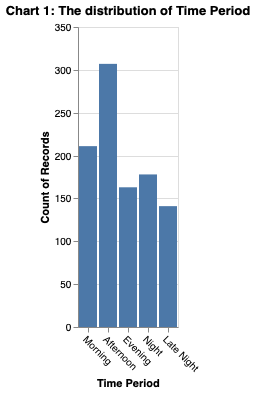

In [14]:
# visualize the distribution of incidents records based on time period
time_period_dist = alt.Chart(data).mark_bar().encode(
    x = alt.X('time_period', title = 'Time Period',sort=['Morning', 'Afternoon','Evening','Night','Late Night']),
    y = alt.Y('count()', title = 'Count of Records')
).configure_axisX(
    labelAngle=45
).properties(title='Chart 1: The distribution of Time Period')
Image('../visualizations/chart1.png')

The plot illustrates that the highest number of incident records typically occurs on Thursday afternoons, which aligns with the previously presented graph. While, the lowest incidence of records is observed during Monday late nights. Notably, both Mondays and Tuesdays exhibit relatively low average incident records. In contrast, Thursdays consistently demonstrate the highest average number of crime records. These findings suggest distinct patterns in incident occurrences across different days of the week, with Thursdays standing out as particularly significant in terms of crime frequency.

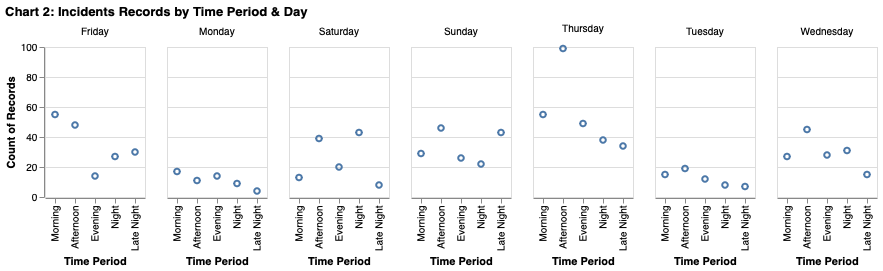

In [15]:
# visualize the incident records based on the time period and day of the week
day_time = alt.Chart(data).mark_point().encode(
    x = alt.X('time_period',title='Time Period',sort=['Morning', 'Afternoon','Evening','Night','Late Night']),
    y = alt.Y('count()', title = 'Count of Records')
).properties(height = 150).facet(
    facet = alt.Facet('incident_day_of_week',title=None,
                      
                      ),
    title = 'Chart 2: Incidents Records by Time Period & Day'
)
   
Image('../visualizations/chart2.png')

### Perform an Analysis

In [16]:
# get the response variable and explanatory variables
X = data.drop(columns=['if_crime'])
y = data['if_crime']

In [17]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from scipy.sparse import csr_matrix
import pandas as pd

Creating a DummyClassifier and comparing its performance to that of LogisticRegression reveals that LogisticRegression outperforms the DummyClassifier by predicting the most frequent class. However, there could be some improvements in our prediction accuracy for LogiisticRegression.

In [18]:
# Perform one-hot encoding with sparse representation
X_encoded = pd.get_dummies(X, sparse=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=123)

# Initialize classifiers
dummy = DummyClassifier()
lr = LogisticRegression()

# Fit the classifiers
dummy.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Evaluate the classifiers
cv_results_dummy = dummy.score(X_test, y_test)
cv_results_lr = pd.DataFrame(pd.DataFrame(cross_validate(lr, X_train, y_train, return_train_score=True)).mean())

# Display the results
print("Baseline:", cv_results_dummy, "\n")
print(cv_results_lr)


Baseline: 0.6866666666666666 

                    0
fit_time     0.046406
score_time   0.008037
test_score   0.710000
train_score  0.713214


It shows the list of coefficients value for each feature, LogisticRegression converts the existing features into numerical and calculate the best coefficient for each feature. The most substantial positive coefficient corresponds to **police_district_mission**, indicating its predominant influence on predicting crime occurrences. While, the smallest negative coefficient is associated with **police_district_Out of SF**, suggesting its minimal impact on crime prediction.

In [19]:
viz_df = pd.DataFrame({"features": X_train.columns, "coefficients": lr.coef_[0]})
viz_df

,features,coefficients
0,incident_day_of_week_Friday,-0.302988
1,incident_day_of_week_Monday,0.273438
2,incident_day_of_week_Saturday,0.163577
3,incident_day_of_week_Sunday,-0.405615
4,incident_day_of_week_Thursday,-0.206586
5,incident_day_of_week_Tuesday,0.191724
6,incident_day_of_week_Wednesday,0.286455
7,police_district_Bayview,0.128220
8,police_district_Central,0.113785
9,police_district_Ingleside,0.026043


### Visualization of the Analysis

The plot provides a more detailed description of the LogiticRegression coefficient of each features.

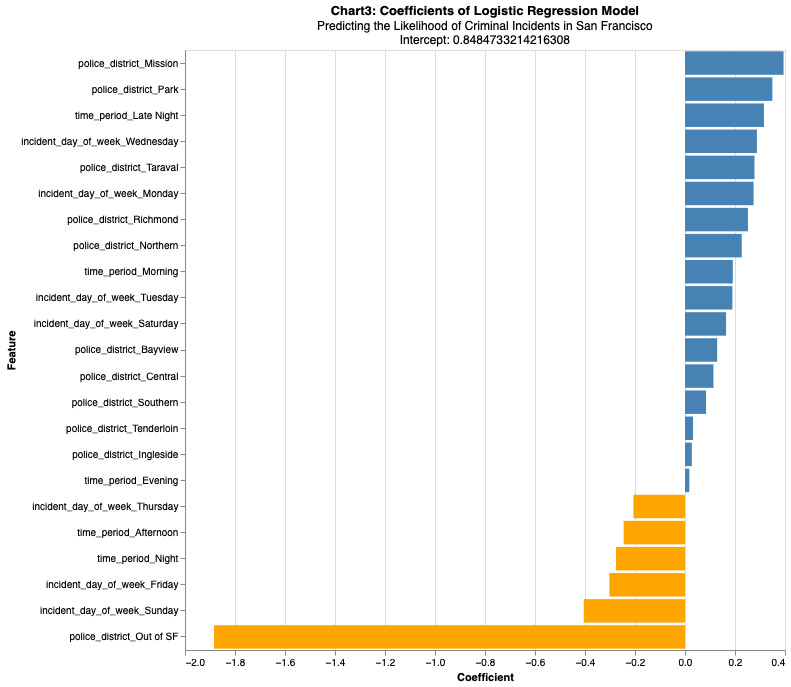

In [20]:
chart = alt.Chart(viz_df).mark_bar().encode(
    x=alt.X('coefficients:Q', title='Coefficient'),
    y=alt.Y('features:N', sort='-x', title='Feature'),
    color=alt.condition(
        alt.datum.coefficients > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(
    title={
        "text": ["Chart3: Coefficients of Logistic Regression Model"], 
        "subtitle": ["Predicting the Likelihood of Criminal Incidents in San Francisco",
                     "Intercept: 0.8484733214216308"]
    },
    width=600,
    height=600
)

Image('../visualizations/chart3.png')

## Discussion


#### Summarize findings
* **Days of the Week**: Tuesday and Wednesday have positive coefficients, suggesting a slight increase in the likelihood of incidents on these days. However, Sunday has a significantly negative coefficient, indicating a lower likelihood of incidents.
* **Police Districts**: The 'Mission' and 'Park' districts show a higher likelihood of incidents, with positive coefficients. In contrast, "out of San Francisco" has a strongly negative coefficient, which is expected as it's outside the city's jurisdiction.
* **Time Periods**: The "Late Night" period has a positive coefficient, suggesting a higher likelihood of incidents during these hours. Conversely, "Afternoon" and "Night" have negative coefficients, indicating a lower likelihood of incidents.

#### whether this is what you expected to find?
The results are consistent with common expectations, such as a higher probability of incidents occurring during late-night hours, potentially because of less visibility and decreased presence of individuals. The substantial negative coefficient for instances labelled 'Out of SF' is reasonable and underscores the model's focus on geographical significance. The diverse effects of various days of the week and police districts may indicate intricate social and environmental elements that affect crime rates.

#### what impact could such findings have?
Analyzing the time and location trends of criminal episodes can assist in strategic planning for law enforcement by optimizing resource allocation and establishing focused preventative strategies. These insights can be used to provide safety alerts and improve community policing activities.


#### what future questions could this lead to?
* In-depth Examination of Districts: What factors contribute to greater occurrence probabilities in specific districts? Additional examination could take into account socio-economic variables, population density, or local event calendars.
* Temporal Dynamics: How do holidays and events at various periods of the year influence these patterns?
* Intervention Evaluation: Assessing the effectiveness of various policing measures in reducing risks at peak hours and in specific regions specified by the model.



## Reference

1. Braga, A. A., Weisburd, D., & Oxford Scholarship Online Law. (2010). *Policing problem places: Crime hot spots and effective prevention.* Oxford University Press. https://doi.org/10.1093/acprof:oso/9780195341966.001.0001
2. D'Angelo, S. (2018). *Criminal behavior linked to thinking about risk, study finds
By Stephen D'Angelo* Cornell Chronicle. https://news.cornell.edu/stories/2018/09/criminal-behavior-linked-thinking-about-risk-study-finds
3. Perry, W. L., McInnis, B., Price, C. C., Smith, S. C., & Hollywood, J. S. (2013). *Predictive Policing: The Role of Crime Forecasting in Law Enforcement Operations.* RAND Corporation. http://www.jstor.org/stable/10.7249/j.ctt4cgdcz
4. Security (2019). *Violent Crimes Most Likely to Occur At Night.* Security. https://www.securitymagazine.com/articles/90384-murder-robbery-and-driving-while-impaired-happen-at-night
